In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
def draw_var(var_name):
# data to plot
    if var_name == 'month':
        unique_values = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    elif var_name == 'new_duration':
        unique_values = ['0','1-102','103-180', '181-258','259-319','320-400','500-1000','1000-1500','1500+']
    else:
        unique_values = [v for v in data[var_name].value_counts().index]
        unique_values.sort()
    
    n_groups = len(unique_values)
    pos_var_list = []
    neg_var_list = []
    
    for var in unique_values:
        temp_pos = (data[data[var_name]==var]['Y'] == 1).sum()/(data[var_name]==var).sum()
        pos_var_list.append(temp_pos)
        neg_var_list.append(1-temp_pos)
        
     # create plot
    fig, ax = plt.subplots(figsize=(10,6))
    index = np.arange(n_groups)
    bar_width = 0.3
    opacity = 0.8
    rects1 = plt.bar(index, pos_var_list, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Positives')
    rects2 = plt.bar(index + bar_width, neg_var_list, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Negatives')

    plt.ylabel('Results')
    if var_name != 'age':
        plt.xticks(index + bar_width, unique_values)
    else:
        plt.xticks(index + bar_width, unique_values, rotation = 90)
        
    plt.axhline(y=pos_percent, linestyle='--')
    plt.legend()
    plt.tight_layout()

# Data Exploration

### Load Data

In [16]:
import pandas as pd
import numpy as np

data = pd.read_csv('bank-additional/bank-additional-full.csv',sep=';')
print(data.columns)
print(data.shape)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
(41188, 21)


In [17]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
data['Y']=(data['y']=='yes').astype(int)
data.drop('y', axis = 1, inplace = True)

### Caluate the percentage of positive cases: surscrible a term deposit

In [19]:
pos_percent = (data[data['Y'] == 1]['Y']).sum()/len(data)
print(pos_percent)

0.11265417111780131


### Social and Economic context attributes: Are they correlated ?

In [20]:
import seaborn as sns
social_data = data[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','nr.employed']]
print ('number of mising value:',social_data.isnull().sum().sum())

number of mising value: 0


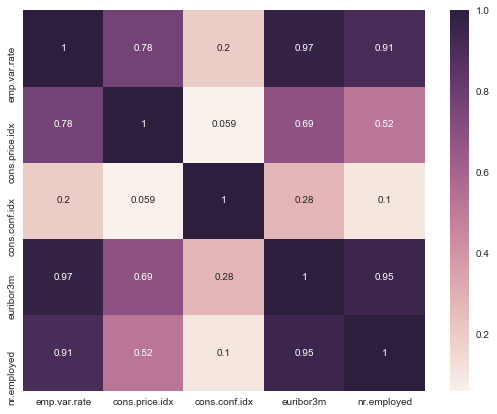

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

social_data_cor = social_data.corr()
f, ax = plt.subplots(figsize=(9,7))

heatmap = sns.heatmap(social_data_cor, annot=True, ax = ax)



figure = heatmap.get_figure()    
figure.savefig('svm_conf.png', dpi=400)

euribor3m and emp.var.rate are heavily correlated. 

### Relationship: duration, month, # of contacts

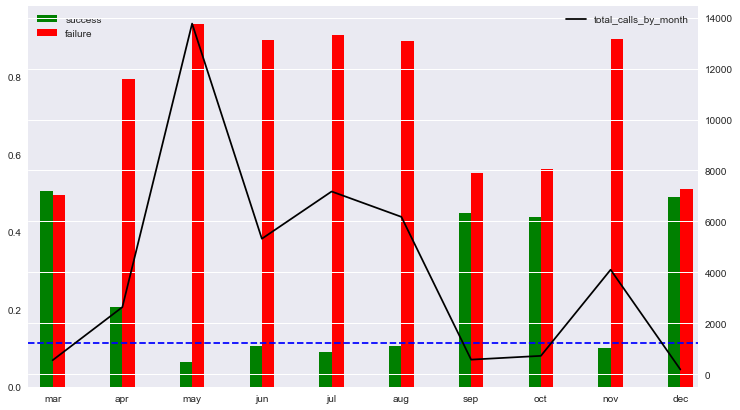

In [23]:
import matplotlib.pyplot as plt

months = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
calls_by_month = dict(data.groupby(['month'])['duration'].count())

sucess = []
failure = []
total_calls = []
for month in months:
    temp = (data[data['month'] == month]['Y'] == 1).sum()/(data['month']== month).sum()
    sucess.append(temp)
    failure.append(1-temp)
    total_calls.append(calls_by_month[month])

month_data = pd.DataFrame({'success': sucess, 'failure': failure, 'total_calls_by_month': total_calls})


month_data[['success','failure']].plot(kind='bar', width = 0.35, figsize=(12, 7), color = ['g','r'])
plt.axhline(y = pos_percent, linestyle='--', color = 'b')

month_data['total_calls_by_month'].plot(secondary_y=True, color = 'black')


ax = plt.gca()
plt.xlim([-0.35, 9.25])
plt.legend()
ax.set_xticklabels(months)
plt.savefig('month')

Therefore, the reason why some months have a much higher successful rate is that they have very small amount of calls-out in those months.

In [24]:
#num_employeed = dict(data.groupby('month')['nr.employed'].mean())

num_employeed = dict(data.groupby('month')['cons.price.idx'].mean())

num_employeed_list=[]
for month in months:
    num_employeed_list.append(num_employeed[month])

#month_data['nr_employee_avg'] = num_employeed_list
month_data['cons.price.idx_avg'] = num_employeed_list

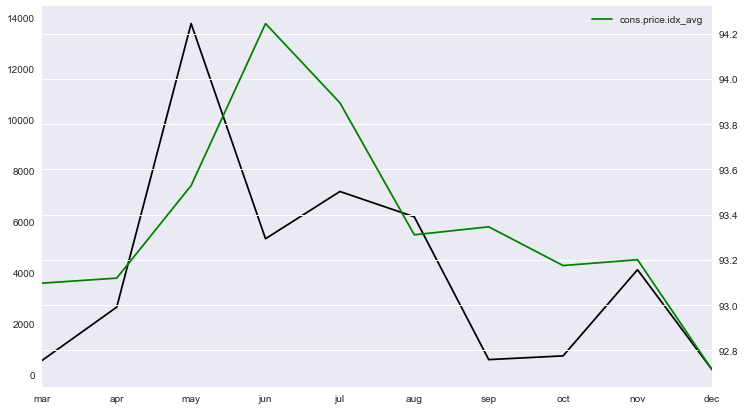

In [25]:
month_data['total_calls_by_month'].plot(figsize=(12, 7), color= 'black')
month_data['cons.price.idx_avg'].plot(secondary_y=True, color = 'green')

ax = plt.gca()
plt.legend()
ax.set_xticklabels(months)

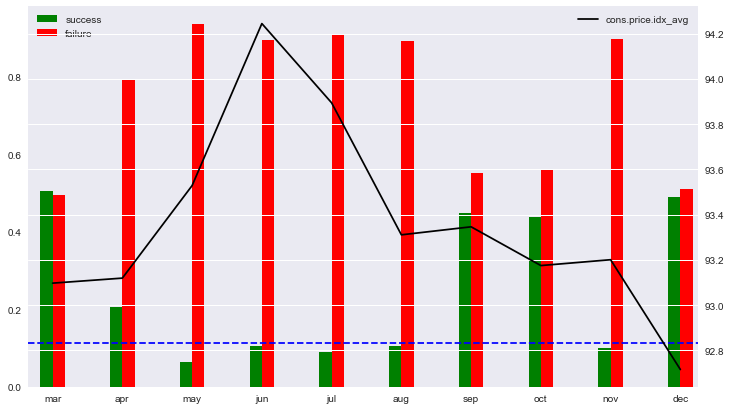

In [27]:
month_data[['success','failure']].plot(kind='bar', width = 0.35, figsize=(12, 7), color = ['g','r'])
plt.axhline(y = pos_percent, linestyle='--', color = 'b')

month_data['cons.price.idx_avg'].plot(secondary_y=True, color = 'black')
plt.xlim([-0.35, 9.25])
ax = plt.gca()
plt.legend()
ax.set_xticklabels(months)
plt.savefig('econoc')

### Total numbers of calls-out and duration: so, it implies that the quality of calls increases success rate?

In [12]:
import warnings
warnings.filterwarnings('ignore')

data['new_duration'] = 0
data['new_duration'][(data['duration'] > 1500)] = '1500+'
data['new_duration'][(data['duration']>1000)&(data['duration']<=1500)] = '1000-1500'
data['new_duration'][(data['duration']>500)&(data['duration']<=1000)] = '500-1000'
data['new_duration'][(data['duration']>319)&(data['duration'] <= 500)] = '320-400'
data['new_duration'][(data['duration']>258)&(data['duration'] <= 319)] = '259-319'
data['new_duration'][(data['duration']>180)&(data['duration'] <= 258)] = '181-258'
data['new_duration'][(data['duration']>102)&(data['duration'] <= 180)] = '103-180'
data['new_duration'][(data['duration']>0)&( data['duration'] <= 102)] = '1-102'
data['new_duration'][(data['duration'] == 0)] = '0'

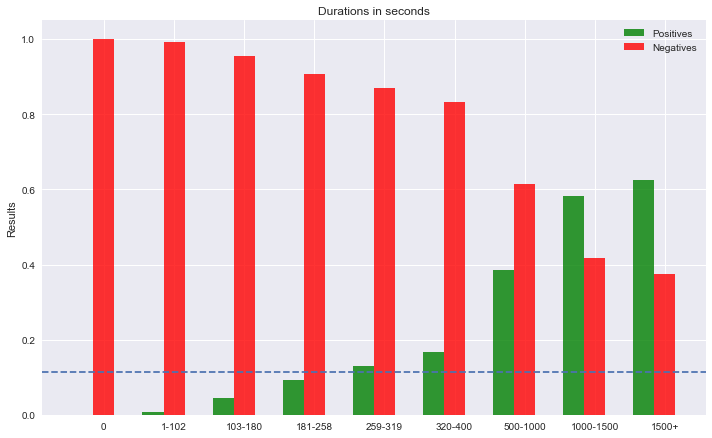

In [14]:
draw_var('new_duration')
plt.title('Durations in seconds')
plt.savefig('duation')

True. When we take a special look at the duration of each call, it does suggest that when duration increases, their successful rate increases as well. Especially, when duration goes beyond 260s(around 5mins), the successful rate is greater than the average successful rate. Therefore, we must admit that human resourses play an important role in affecting the result.

However, the duration is actually affected how hard the employees work to pursuade customers to subscribe the term deposit and it has nothing to do with the customers' social and ecnomic background. Since our major intention is to predict whether one customer will subscribe based on his information, we might want to drop the 'duration' variable.


### Check unkown value: if missing at random

In [ ]:
ind = []
unknown_portion = []
P_y_given_unknown = []
for col in data.columns:
    if 'unknown' in data[col].value_counts().index:
        ind.append(col)
        unknown_portion.append((data[col] == 'unknown').sum()/len(data))
        P_y_given_unknown.append(sum(data['Y'][data[col]=='unknown']==1)/sum(data[col]=='unknown'))

na_info = pd.DataFrame({'unknown_portion':unknown_portion,'P_y_given_unknown':P_y_given_unknown }, index = ind)
na_info

In [ ]:
pd.crosstab(data['housing'], data['loan'])

Note that the proportions of unknown values for 'loan' and 'housing' are exactly same. In other words, if we do not know whether one person has an housing loan or not, we dont know whether he has a personal loan neither. Vice Verse. This is why when housing and loan are both unknown, they are having a same successful rate.

Even though they take only 2.4% of whole data, it is still not missing at random. There must be some factors affecting this results.

In [ ]:
print (len(data[(data['housing'] =='unknown') & (data['loan'] =='unknown')]))
print (len(data[(data['housing'] =='unknown')]))
print (len(data[(data['housing'] =='unknown') & (data['loan'] =='unknown')& (data['pdays'] == 999)]))
print (len(data[(data['housing'] =='unknown') & (data['loan'] =='unknown')& (data['poutcome'] == 'nonexistent')]))
print (len(data[(data['housing'] =='unknown') & (data['loan'] =='unknown')& (data['previous'] == 0)]))

data[(data['housing'] =='unknown') & (data['loan'] =='unknown')]['pdays'].describe()

956 Out of 999 observations whose 'housing' and 'loan' are unknown have never been contacted before.

Therefore, the reason why it is "missing not at random" is that they are the costomers who are contacted for the first time during the entire campaigns. Because we have never talked to them, we dont know them very well.

In [ ]:
draw_var('housing')
draw_var('loan')

## Regard of Last campaign(Past)
### Check : Customers that are first contacted

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


In [ ]:
draw_var('campaign')
plt.xlabel('number of contacts performed during this campaign')

Bascially, for every campagin, if the customers have already refused to subscribe for the first 3 times, do not watse resources to try another time.

In [ ]:
draw_var('pdays')
draw_var('previous')
plt.xlabel('number of contacts performed before this campaign')
draw_var('poutcome')

In [ ]:
print ('the porption of pdays == 999:', len(data[data['pdays'] ==999])/len(data))
print ('the porption of nonexistent:',len(data[data['poutcome'] =='nonexistent'])/len(data))

In [ ]:
data['poutcome'].value_counts()

In [ ]:
print ('never contacted and pcomeout nonexistent:',len(data[(data['pdays'] == 999)&(data['poutcome'] == 'nonexistent')])/len(data))
print ('never contacted but failure:',len(data[(data['pdays'] == 999)&(data['poutcome'] == 'failure')]))
print ('never contacted but success:',len(data[(data['pdays'] == 999)&(data['poutcome'] == 'success')]))

#### The result suggests that there might be some typing errors in pdays. Recommendation is to remove pdays variable. 
#### When pdays === 999, the poutcome are either failure or nonexistent, so the poutcome has already offered sufficient information.

In [ ]:
print ('porption of of previous call is zero:',sum(data['previous'] == 0)/len(data))

To sum up, 

### Other variable explorations

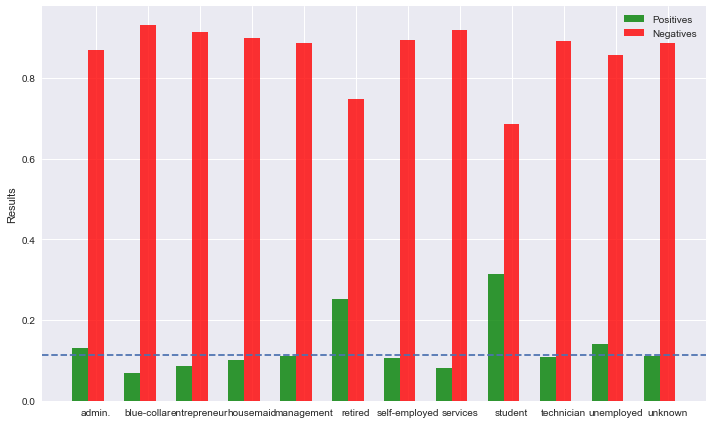

In [29]:
draw_var('job')
plt.savefig('job')

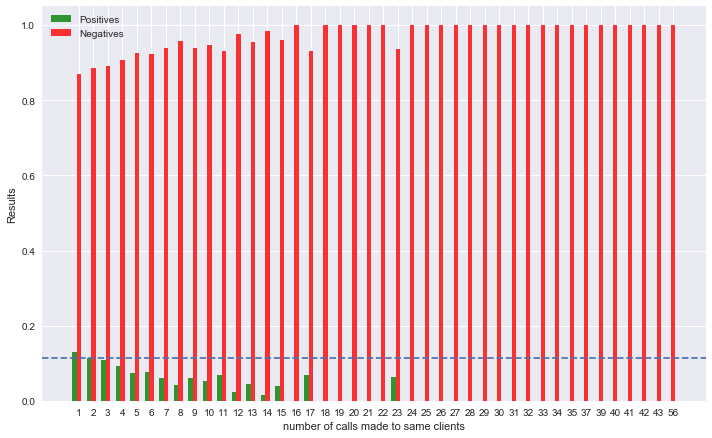

In [32]:
draw_var('campaign')
plt.xlabel('number of calls made to same clients')
plt.savefig('campaign')

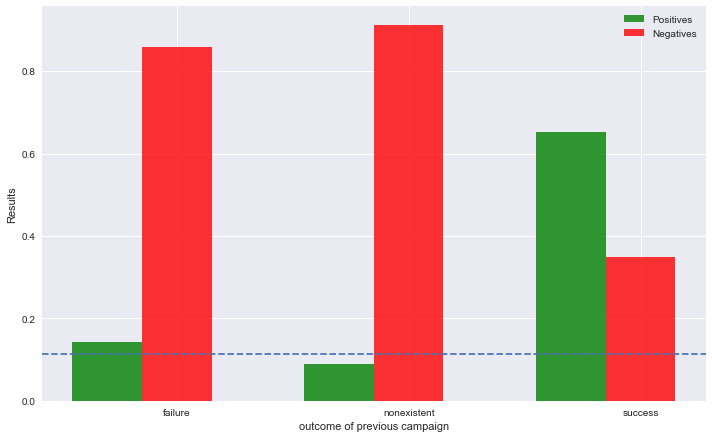

In [33]:
draw_var('poutcome')
plt.xlabel('outcome of previous campaign')
plt.savefig('poutcome')

The first plots suggests that the distribution of average successful rate has two peaks, one being in younger age range [17,26] and the other in older age range [60, 60+].

The second plots suggests that students and retired are more likely to subscribe the terms.
These two facts are supporting each other. Therefore, we should try to target younger and senior groups.

In [ ]:
draw_var('marital')

In [ ]:
draw_var('day_of_week')

# Data Cleaning

In [ ]:
# drop new_duration
data.drop('new_duration', axis = 1, inplace = True)

In [4]:
#drop pdays
data.drop('pdays', axis = 1, inplace = True)

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Convert categorical variables to dummy variables

In [6]:
datatype = dict(data.dtypes)

catego_val = []
numerical_val = []
for key, item in datatype.items():
    if item == 'object':
        catego_val.append(key)
    else:
        numerical_val.append(key)

print (len(catego_val), catego_val)

10 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [7]:
dummy_data = pd.get_dummies(data=data, columns = catego_val)

In [8]:
dummy_data.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'Y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 

In [9]:
dummy_data.drop('housing_unknown', axis = 1, inplace = True)
#since housing_unknown is completely identical as loan_unknown

### Normalize numerical variables

In [10]:
data[numerical_val].describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Normalize 'duration', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m','nr.employed'

In [11]:
from sklearn.preprocessing import StandardScaler

normal_val = ['duration', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m','nr.employed']

scale = StandardScaler()
normalized = scale.fit_transform(data[normal_val])

normalized_data = pd.DataFrame.from_dict(normalized)
normalized_data.columns = normal_val


In [12]:
##update the data with normalized variables
for val in normal_val:
    dummy_data[val] = normalized_data[val]

In [13]:
dummy_data.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0.010471,1,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,0,0,1,0,0,0,0,1,0
1,57,-0.421501,1,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,0,0,1,0,0,0,0,1,0
2,37,-0.124520,1,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,0,0,1,0,0,0,0,1,0
3,40,-0.413787,1,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,0,0,1,0,0,0,0,1,0
4,56,0.187888,1,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,0,0,1,0,0,0,0,1,0


#### W/O duration variable

In [14]:
dummy_data_noduration = dummy_data.drop('duration', axis = 1)

In [15]:
dummy_data_noduration_X = dummy_data_noduration.drop('Y', axis = 1)
dummy_data_noduration_Y = dummy_data_noduration['Y']

### Split

In [16]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_target, test_target = train_test_split(dummy_data_noduration_X, dummy_data_noduration_Y , test_size=0.2, random_state=42)

In [17]:
from sklearn.cross_validation import KFold
kfolds = KFold(train_features.shape[0], n_folds = 5)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

SVM_parameters = {'kernel':('sigmoid', 'rbf', 'poly'), 'C':[1, 10, 100]}

lr_parameters = dict(C = [10**i for i in range(-3, 3)],
                  penalty = ['l1', 'l2'])

knn_parameters = {'n_neighbors': [5, 10, 15, 20], 'weights':['uniform', 'distance'], 'leaf_size':[20,30,40]}

nn_parameters = dict(hidden_layer_sizes=[(30,),(50,),(70,),(100,)], activation=['relu', 'tanh', 'logistic'], learning_rate=['constant', 'adaptive'])

#decision_parameters = dict(max_depth=[5, 10, 15, 20], min_samples_split=[1,6,12], min_samples_leaf=[1,10,20])
decision_parameters = dict(max_depth=[5, 10, 15, 20], min_samples_split=[10,60,120], min_samples_leaf=[10,50,100,200])

### Logistic Regression GridSearch

In [27]:
lr_grid_search = GridSearchCV(linear_model.LogisticRegression(), lr_parameters, cv = kfolds, scoring = 'roc_auc') 
lr_grid_search.fit(train_features, train_target)

#3rd, get the score of the best model and print it
best_1r_1 = lr_grid_search.best_score_
print(best_1r_1)

0.79495151933


In [ ]:
best_lr = lr_grid_search.best_estimator_
best_lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_parameters, cv = kfolds, scoring = 'roc_auc') 
knn_grid_search.fit(train_features, train_target)

#3rd, get the score of the best model and print it
best_knn_1 = knn_grid_search.best_score_
best_knn_1

KeyboardInterrupt: 

In [ ]:
best_knn = knn_grid_search.best_estimator_
best_knn

### NN

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=43)
nn_grid_search = GridSearchCV(mlp, nn_parameters, cv = kfolds, scoring = 'roc_auc') 
nn_grid_search.fit(train_features, train_target)

#3rd, get the score of the best model and print it
best_nn_1 = nn_grid_search.best_score_
print(best_nn_1)

In [ ]:
best_nn = nn_grid_search.best_estimator_
best_nn

### DT

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), decision_parameters, cv = kfolds, scoring = 'roc_auc') 
dt_grid_search.fit(train_features, train_target)

#3rd, get the score of the best model and print it
best_dt_1 = dt_grid_search.best_score_
print(best_dt_1)

0.791384874939


In [25]:
dt_grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=120, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Naive Bayes

In [19]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# defines a classification tree
def NBClassifier(X_train,y_train,X_test,y_test, auc):
    clf = GaussianNB()
    clf.fit(X_train,y_train)
    if (auc==0):
        cm = confusion_matrix(clf.predict(X_test),y_test)
        return cm # (cm[0][0]+cm[1][1])/float(sum(cm))
    else:
        return roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

In [23]:
NBClassifier(train_features, train_target,test_features, test_target,1)

0.76105805174197694

## Evaluate models based on evaluation framework